# Load DNN

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
#Call tf.reset_default_graph() before you build your model (and the Saver). This will ensure that the variables get the names you intended, but it will invalidate previously-created graphs.
tf.reset_default_graph() 

# random number seed
np.random.seed(0)
tf.set_random_seed(0)

# load data
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


## Define Model before loading

In [3]:
# input data
x = tf.placeholder(tf.float32, [None, 784])

# 1st fully connected layer
w1 = tf.Variable(tf.truncated_normal([784, 1000]))
b1 = tf.Variable(tf.constant(0.1, shape=[1000]))
hidden1 = tf.nn.relu(tf.matmul(x, w1) + b1)

# 2nd fully connected layer
w2 = tf.Variable(tf.truncated_normal([1000, 1000]))
b2 = tf.Variable(tf.constant(0.1, shape=[1000]))
hidden2 = tf.nn.relu(tf.matmul(hidden1, w2) + b2)

# 3rd fully connected layer
w3 = tf.Variable(tf.truncated_normal([1000, 1000]))
b3 = tf.Variable(tf.constant(0.1, shape=[1000]))
hidden3 = tf.nn.relu(tf.matmul(hidden2, w3) + b3)

# ouput layer
w4 = tf.Variable(tf.zeros([1000, 10]))
b4 = tf.Variable(tf.zeros([10]))
output = tf.matmul(hidden3, w4) + b4
output_after_softmax = tf.nn.softmax(output)

#define loss (cost) function
true_labels = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output, labels = true_labels)) 
# train_step = tf.train.AdamOptimizer(0.0001).minimize(loss)
correct_prediction = tf.equal(tf.argmax(output_after_softmax, 1), tf.argmax(true_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Load model

In [4]:
# prepare session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()
saver.restore(sess, "./model/dnn_session")

## Exploits model

In [5]:
# now we test model per epoch
loss_val, acc_val = sess.run([loss, accuracy],feed_dict={x:mnist.test.images,true_labels:mnist.test.labels})
print ('Loss: %f, Accuracy: %f'% (loss_val, acc_val))

Loss: 0.828864, Accuracy: 0.924100


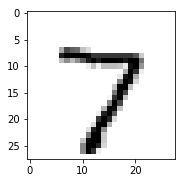

In [8]:
fig = plt.figure(figsize=(8, 6))
ax0 = fig.add_subplot(2, 1, 1)
ax0.imshow(mnist.test.images[0].reshape([28, 28]),cmap=plt.cm.gray_r, interpolation='nearest')

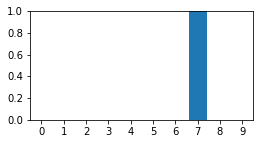

In [9]:
p_val = sess.run(output_after_softmax, feed_dict={x:[mnist.test.images[0]]})

fig = plt.figure(figsize=(4,2))
pred = p_val[0]
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks(range(10))
subplot.set_xlim(-0.5,9.5)
subplot.set_ylim(0,1)
subplot.bar(range(10), pred, align='center')
plt.show()